**Imports and set magic** 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import fun1

**Folder path definition: Copy and insert local path of "1 Summary Statistics/Data"**

In [2]:
folder = "/Users/emmaknippel/Desktop/POLIT 10 SEM/Dynamic Programming/Replicating the Innovators Dilemma/1 Summary Statistics/Data"

**Setup**

In [3]:
State, X, P, Q = fun1.setup(folder)

**Plot**

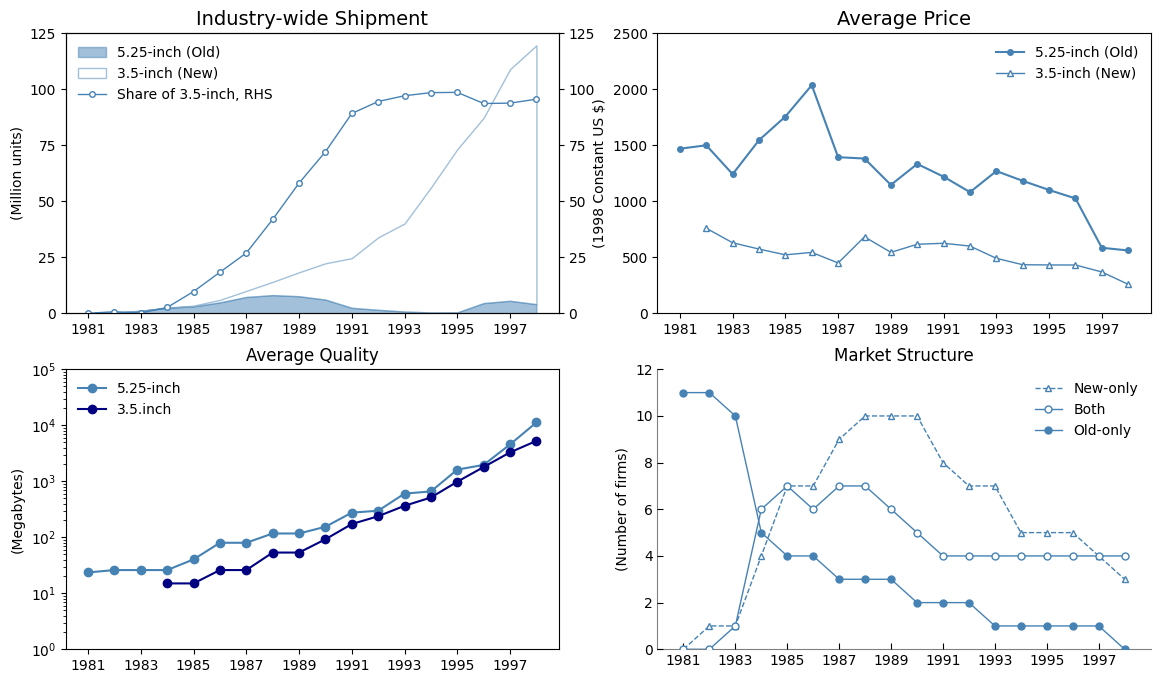

In [4]:
fun1.plot(State, X, P, Q)